In [54]:
import json
import pandas as pd
import numpy as np

In [55]:
#papers_df is pandas dataframe object
papers_df = pd.read_json('Papers_Metadata_6K.json')

papers_df.head()

,author,day,id,link,month,summary,tag,title,year
0,"[{'name': 'Ahmed Osman'}, {'name': 'Wojciech S...",1,1802.00209v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,2018
1,"[{'name': 'Ji Young Lee'}, {'name': 'Franck De...",12,1603.03827v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",3,Recent approaches based on artificial neural n...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Sequential Short-Text Classification with Recu...,2016
2,"[{'name': 'Iulian Vlad Serban'}, {'name': 'Tim...",2,1606.00776v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",6,We introduce the multiresolution recurrent neu...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Multiresolution Recurrent Neural Networks: An ...,2016
3,"[{'name': 'Sebastian Ruder'}, {'name': 'Joachi...",23,1705.08142v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",5,Multi-task learning is motivated by the observ...,"[{'term': 'stat.ML', 'scheme': 'http://arxiv.o...",Learning what to share between loosely related...,2017
4,"[{'name': 'Iulian V. Serban'}, {'name': 'Chinn...",7,1709.02349v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",9,We present MILABOT: a deep reinforcement learn...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",A Deep Reinforcement Learning Chatbot,2017


In [56]:
print("Papers : ", papers_df.shape)

Papers :  (6000, 9)


In [57]:
papers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   author   6000 non-null   object
 1   day      6000 non-null   int64 
 2   id       6000 non-null   object
 3   link     6000 non-null   object
 4   month    6000 non-null   int64 
 5   summary  6000 non-null   object
 6   tag      6000 non-null   object
 7   title    6000 non-null   object
 8   year     6000 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 422.0+ KB


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{3,}',
            ngram_range=(1, 3),
            stop_words = 'english')

papers_df['summary'] = papers_df['summary'].fillna('')


In [59]:
tfv_matrix = tfv.fit_transform(papers_df['summary'])

In [60]:
def Find_Paper_Given_By_Keyword(words_array, keyword):
    index = words.index(keyword)
    the_most_used_on_paper_list = tfv_matrix[:, index].toarray()
    
    #Index the paper id and score
    count = 0
    the_most_used_on_paper_dict = {}
    for i in the_most_used_on_paper_list:
        the_most_used_on_paper_dict[count] = i
        count = count + 1 
        
    #Sort papers which have the most occurrence of  keyword that is given
    top_paper = {k: v for k, v in sorted(the_most_used_on_paper_dict.items(), key=lambda item: item[1],reverse=True)[:10]}
    
    #List in List [[paper_id,title,score]]
    title_list = []
    for i in top_paper.keys():
        title_list.append([i, papers_df.iloc[i].title, top_paper[i][0]])
    df = pd.DataFrame(title_list, columns = ['paper_id', 'title', 'score'])
    return df

In [61]:
words = tfv.get_feature_names()
df = Find_Paper_Given_By_Keyword(words, "algorithm")

In [69]:
len(words)

37810

In [62]:
df.head(10)

,paper_id,title,score
0,1679,SpCoSLAM 2.0: An Improved and Scalable Online ...,0.319020
1,2340,The threshold EM algorithm for parameter learn...,0.304471
2,2574,Learning to Optimize,0.289381
3,5724,Efficiently Sampling Multiplicative Attribute ...,0.261980
4,5314,Iterative Markov Chain Monte Carlo Computation...,0.238315
5,2201,Learning Causal Structures Using Regression In...,0.237384
6,2169,Reinforcement Learning Algorithm Selection,0.232130
7,4535,Online prediction of ovarian cancer,0.229165
8,5691,Boosting as a Product of Experts,0.208769
9,2329,An Online Learning-based Framework for Tracking,0.206450


In [63]:
#The following code;
#Find the most common words in the corpus(papers_df['summary'])
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{3,}',
            ngram_range=(1, 3),
            stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [64]:
top_n_paper_list = get_top_n_words(papers_df['summary'],10)

In [65]:
top_n_paper_df = pd.DataFrame(top_n_paper_list, columns = ["keyword","number"])

In [66]:
top_n_paper_df.head(10)

,keyword,number
0,learning,7135
1,data,5076
2,model,4629
3,based,3555
4,models,3234
5,neural,3145
6,network,2914
7,networks,2913
8,algorithm,2810
9,method,2751


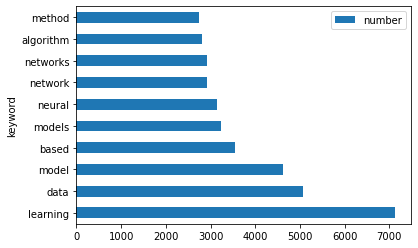

In [67]:
import matplotlib.pyplot as plt
top_n_paper_df.plot.barh(x ='keyword', y='number')
plt.show()

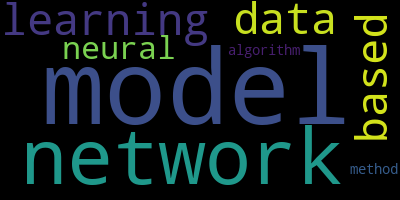

In [71]:
# Import the wordcloud library
import wordcloud

# Join the different processed titles together.
long_string = ' '.join(top_n_paper_df['keyword'])

# Create a WordCloud object, generate a wordcloud and visualise it
wordcloud = wordcloud.WordCloud()

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [50]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [51]:
sig[0]

array([0.76159962, 0.76159429, 0.76159443, ..., 0.76159435, 0.76159439,
       0.76159426])

In [111]:
# Reverse mapping of indices and paper titles
indices = pd.Series(papers_df.index, index=papers_df['title']).drop_duplicates()

In [112]:
indices

title
Dual Recurrent Attention Units for Visual Question Answering                                        0
Sequential Short-Text Classification with Recurrent and Convolutional\n  Neural Networks            1
Multiresolution Recurrent Neural Networks: An Application to Dialogue\n  Response Generation        2
Learning what to share between loosely related tasks                                                3
A Deep Reinforcement Learning Chatbot                                                               4
                                                                                                ...  
Ranking medical jargon in electronic health record notes by adapted\n  distant supervision      11995
Multi-view Recurrent Neural Acoustic Word Embeddings                                            11996
Knowledge Enhanced Hybrid Neural Network for Text Matching                                      11997
A Neural Architecture Mimicking Humans End-to-End for Natural Language\n  In

In [113]:
indices['Semi-supervised Learning with Ladder Networks']

1003

In [114]:
list(enumerate(sig[indices['Semi-supervised Learning with Ladder Networks']]))

[(0, 0.7615942786491128),
 (1, 0.7615943165074566),
 (2, 0.7615943246385266),
 (3, 0.761594259097504),
 (4, 0.7615942321171106),
 (5, 0.7615942256727177),
 (6, 0.7615942266683117),
 (7, 0.7615941966967038),
 (8, 0.7615941944505098),
 (9, 0.7615941990357796),
 (10, 0.7615942578740378),
 (11, 0.7615943212855527),
 (12, 0.7615943055854135),
 (13, 0.7615942387986054),
 (14, 0.7615942393932918),
 (15, 0.7615943664305737),
 (16, 0.761594373609597),
 (17, 0.7615942264535757),
 (18, 0.7615943157269056),
 (19, 0.7615943422756899),
 (20, 0.761594325280186),
 (21, 0.7615942360275642),
 (22, 0.7615944462788028),
 (23, 0.7615941993974066),
 (24, 0.7615942160006547),
 (25, 0.7615943382310432),
 (26, 0.7615941851067134),
 (27, 0.7615944153612677),
 (28, 0.7615945357163706),
 (29, 0.7615943192000358),
 (30, 0.7615941954095904),
 (31, 0.7615943360512614),
 (32, 0.7615941873188916),
 (33, 0.7615942170918317),
 (34, 0.7615942227479546),
 (35, 0.7615941559557649),
 (36, 0.7615944220555341),
 (37, 0.761594

In [115]:
sorted(list(enumerate(sig[indices['Semi-supervised Learning with Ladder Networks']])), key=lambda x: x[1], reverse=True)

[(1003, 0.7615996245310577),
 (993, 0.7615963273553987),
 (883, 0.7615954004544923),
 (9802, 0.7615953665797112),
 (642, 0.7615950356882226),
 (1054, 0.7615950177746793),
 (241, 0.7615950055605365),
 (2546, 0.7615950015325132),
 (9860, 0.7615949968116802),
 (9805, 0.761594984240534),
 (7718, 0.7615949502612802),
 (3543, 0.7615949091955306),
 (7534, 0.7615949054783787),
 (1058, 0.7615949043695475),
 (3056, 0.7615948907640273),
 (967, 0.7615948640397727),
 (2655, 0.761594847934522),
 (7503, 0.7615948478911889),
 (1184, 0.7615948472423735),
 (8430, 0.7615948031198031),
 (8360, 0.7615947865124959),
 (6674, 0.7615947608004944),
 (1390, 0.7615947252700784),
 (953, 0.7615947246607092),
 (1237, 0.7615947244575196),
 (6953, 0.761594722943076),
 (964, 0.7615947146971463),
 (7091, 0.7615947039114923),
 (1179, 0.7615947014472026),
 (5009, 0.7615946934077819),
 (1114, 0.7615946924951923),
 (1359, 0.7615946915004839),
 (2974, 0.7615946884024527),
 (8758, 0.7615946831408358),
 (4946, 0.76159467998113

In [138]:
def give_rec(title, sig=sig):
    # Get the index corresponding to title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the paper 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar papers
    sig_scores = sig_scores[1:11]
    
    data = []
    count = 0
    while count<10:
        data.append([sig_scores[count][0],(papers_df['title'].iloc[sig_scores[count][0]]), sig_scores[count][1]])
        count=count+1

    df = pd.DataFrame(data, columns = ["paper_id", "title", "score"])
    return df

In [139]:
# Testing our content-based recommendation system with Genetic Algorithms and its use with back-propagation network
give_rec('Semi-supervised Learning with Ladder Networks').head(10)

,paper_id,title,score
0,993,Lateral Connections in Denoising Autoencoders ...,0.761596
1,883,Knowledge Transfer Pre-training,0.761595
2,9802,Deconstructing the Ladder Network Architecture,0.761595
3,642,Semi-Supervised Phoneme Recognition with Recur...,0.761595
4,1054,Adversarial Ladder Networks,0.761595
5,241,Deeply-Supervised Nets,0.761595
6,2546,Auxiliary Deep Generative Models,0.761595
7,9860,Semi-Supervised Learning with IPM-based GANs: ...,0.761595
8,9805,Towards Principled Unsupervised Learning,0.761595
9,7718,Semi-Supervised Learning Enabled by Multiscale...,0.761595
